### Background

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Phase 1 Ask
1. Business Task:
* How "casual" riders and "annual" members use Cyclistic bikes differently?

2. Key stakeholders:
* Lily Moreno, Director of marketing
* Cyclistic executive team
* Cyclistic marketing anlytics team

###  Phase 2 Prepare
1. Credibility  of Data
* It is an open source public data of previous 12 months from Apr,2021-Mar,2022. Data is reliable and original as it is first party data from the company Motivate International Inc. This data has a lot of useful information and all the information needed for anlaysis.

2. Sorting and Filtering Data
* Data is downloaded from [here](http://divvy-tripdata.s3.amazonaws.com/index.html) and consist of .csv files.
* For this kaggle notebook, data has been downloaded from [this](https://www.kaggle.com/datasets/salamibrahim/cyclistic?select=202105-divvy-tripdata.csv)

In [1]:
#installing packages needed for cleaning, manipulation, analysis,and visualization
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
library(janitor)
library(skimr)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#Importing  Datasets
apr21<- read.csv("../input/cyclistic/202104-divvy-tripdata.csv")
may21<- read.csv("../input/cyclistic/202105-divvy-tripdata.csv")
jun21<- read.csv("../input/cyclistic/202106-divvy-tripdata.csv")
jul21<- read.csv("../input/cyclistic/202107-divvy-tripdata.csv")
aug21<- read.csv("../input/cyclistic/202108-divvy-tripdata.csv")
sep21<- read.csv("../input/cyclistic/202109-divvy-tripdata.csv")
oct21<- read.csv("../input/cyclistic/202110-divvy-tripdata.csv")
nov21<- read.csv("../input/cyclistic/202111-divvy-tripdata.csv")
dec21<- read.csv("../input/cyclistic/202112-divvy-tripdata.csv")
jan22<- read.csv("../input/cyclistic/202201-divvy-tripdata.csv")
feb22<- read.csv("../input/cyclistic/202202-divvy-tripdata.csv")
mar22<- read.csv("../input/cyclistic/202203-divvy-tripdata.csv")

In [3]:
#To get comprehensive summary of Apr,2021
skim_without_charts(apr21)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ride_id,0,1.0000000,16,16,0,337230,0,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
3,character,started_at,0,1.0000000,19,19,0,298722,0,NA,NA,NA,NA,NA,NA,NA
4,character,ended_at,0,1.0000000,19,19,0,298625,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,0,1.0000000,0,53,26056,682,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,0,1.0000000,0,35,26056,682,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,0,1.0000000,0,53,28174,682,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,0,1.0000000,0,35,28174,682,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values
Name                       apr21 
Number of rows             337230
Number of columns          13    
_______________________          
Column type frequency:           
  character                9     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0   337230          0
2 rideable_type              0             1  11  13     0        3          0
3 started_at                 0             1  19  19     0   298722          0
4 ended_at                   0             1  19  19     0   298625          0
5 start_station_name         0             1   0  53 26056      682          0
6 start_station_id           0             1   0  35 26056     

This function provides the comprehensive summary for April showing missing values in columns, data structure and mean for the quantitative data.

In [4]:
#compare columns of different datasets
compare_df_cols(apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21,jan22,feb22,mar22)

column_name,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21,jan22,feb22,mar22
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,character,character,character,character,character,character,character,character,character,character,character,character
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


Every dataset has same number of columns with same data structure and same column name. so it is easy to merge all datasets together in one large dataset. It is easier to do any manipulationa and calculation with this dataset.

In [5]:
full_data<- rbind(apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21,jan22,feb22,mar22)
glimpse(full_data)

Rows: 5,723,532
Columns: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <chr> "2021-04-12 18:25:36", "2021-04-27 17:27:11", "2021…
$ ended_at           <chr> "2021-04-12 18:56:55", "2021-04-27 18:31:29", "2021…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

### Phase 3 Process
1. Cleaning data to check for errors and duplication
* Here, the data will be prepared for anlysis by looking out for duplicates, skewed data, or NULL values.

In [6]:
#Look out for any duplicate value and then remove it from the dataset
duplicate<-sum(duplicated(full_data$ride_id))

if(duplicate>0){
    full_data <- full_data %>%
        distinct(ride_id, .keep_all = TRUE)
    }

print(paste("Number of duplicates removed: ",duplicate))

[1] "Number of duplicates removed:  0"


In [7]:
#Filling in any empty column with NA
full_data[full_data==""]<-NA #fill in empty strings with NA

colSums(is.na(full_data))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            745376             745373             796247             796247 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4716               4716 
     member_casual 
                 0

In [8]:
#Dropping all NA values for geographic locations which could affect the analysis
full_data<- full_data %>%
    drop_na(start_lat:end_lng) 
colSums(is.na(full_data))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            745376             745373             791531             791531 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual 
                 0

In [9]:
#Converting starting time and ending time to datetime from characte
#so that calculation is easier
full_data$started_at<-as_datetime(full_data$started_at, tz=NULL, format=NULL)
full_data$ended_at<-as_datetime(full_data$ended_at, tz=NULL, format=NULL)

glimpse(full_data)

Rows: 5,718,816
Columns: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

Adding new columns to the dataset that will be useful in analysis as day of the week, month, year of ride, duration of the ride.

In [10]:
#adding new columns to data that may be useful for analysis

full_data<-full_data%>%
 mutate(day_of_week=wday(started_at,label=TRUE,abbr=TRUE),
       month_of_ride=month(started_at,label=TRUE,abbr=TRUE),
       year_of_ride=year(started_at),
       ride_length=hms::as_hms(ended_at-started_at),
       time_started=hms::as_hms(started_at),
       time_ended=hms::as_hms(ended_at))
glimpse(full_data)

Rows: 5,718,816
Columns: 19
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

In [11]:
#Filtering columns for when the duration was greater than 0
full_data<- full_data%>%
  filter(ride_length>=0)

glimpse(full_data)

Rows: 5,718,671
Columns: 19
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

This is the cleaned data that is now ready for analysis.

In [ ]:
#exporting cleaned data to .csv file
write.csv(full_data,"/kaggle/working/Cyclistic_apr21_mar22.csv",row.names=FALSE)

### Phase 4 Analyze
1. Performing Calculations on the new cleaned dataset and analyzing it for insights valuable to the company.
* Found out the summary of the data(mean time travelled, variance in travelled time, and max time travelled by differents users ("casual" and "member").

In [12]:
#finding summary of data grouping by annual members and casual members
summary<-full_data%>%
   group_by(member_casual)%>%
summarize(mean_time=hms::as_hms(mean(ride_length)),
          sd_time=hms::as_hms(sd(ride_length)),
          max_time=hms::as_hms(max(ride_length)))
print(summary)

# A tibble: 2 × 4
  member_casual mean_time     sd_time         max_time 
  <chr>         <time>        <time>          <time>   
1 casual        29'43.759143" 04:04:22.358919 932:24:09
2 member        13'06.986359" 00:20:15.298373  24:59:56


On average, casual members have longher duration than annual members. Also maximum time travelled by annual member is almost 26 hours whereas maximum time for casual member is 932 hours which is an outlier.
To inspect this oulier further, I performed the following calculation.

In [13]:
full_data %>% 
  group_by(member_casual) %>% 
  filter(ride_length > 7*24*60*60) %>% 
  count()

member_casual,n
<chr>,<int>
casual,244


It seems more than 300 casual members have trips fro more than a week. This will mosst likely cause a skew to the casual riders. These outliers will be mainatined in the dataframe.

In [14]:
#Rides occur on day for different users
mode_of_weekday<-full_data%>%
  group_by(member_casual,day_of_week)%>%
  summarize(n=n(),.groups = NULL)%>%
  slice_max(n)
print(mode_of_weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


# A tibble: 2 × 3
# Groups:   member_casual [2]
  member_casual day_of_week      n
  <chr>         <ord>        <int>
1 casual        Sat         549188
2 member        Wed         499777


In [15]:
#Average ride by different users throughout the year
rides_by_month <- full_data %>% 
  group_by(member_casual, year_of_ride, month_of_ride) %>% 
  summarize(mean_ride_time = hms::as_hms(mean(ride_length)), .groups = 'keep')%>%
  pivot_wider(names_from=member_casual,values_from=mean_ride_time)

print(rides_by_month)

# A tibble: 12 × 4
# Groups:   year_of_ride, month_of_ride [12]
   year_of_ride month_of_ride casual        member       
          <dbl> <ord>         <time>        <time>       
 1         2021 Apr           36'36.494795" 14'27.282626"
 2         2021 May           36'58.560880" 14'25.578098"
 3         2021 Jun           35'38.754758" 14'20.202777"
 4         2021 Jul           31'26.151015" 14'00.339941"
 5         2021 Aug           27'25.084931" 13'49.916251"
 6         2021 Sep           26'40.050437" 13'29.001632"
 7         2021 Oct           24'10.410749" 12'15.462064"
 8         2021 Nov           20'05.166868" 11'05.313129"
 9         2021 Dec           21'16.983538" 10'50.219725"
10         2022 Jan           23'44.343498" 11'36.787376"
11         2022 Feb           22'05.406114" 11'03.467596"
12         2022 Mar           25'44.323264" 11'44.605042"


In [16]:
#Average ride duration by different users on days of the week 
rides_by_weekdays <- full_data %>% 
  group_by(member_casual, day_of_week) %>% 
  summarize(mean_ride_time = hms::as_hms(mean(ride_length)), .groups = 'keep') %>% 
  pivot_wider(names_from = member_casual, values_from = mean_ride_time)

print(rides_by_weekdays)

# A tibble: 7 × 3
# Groups:   day_of_week [7]
  day_of_week casual        member       
  <ord>       <time>        <time>       
1 Sun         34'53.145866" 14'58.612657"
2 Mon         29'32.906545" 12'42.736841"
3 Tue         25'58.600241" 12'18.766190"
4 Wed         26'02.373229" 12'26.009400"
5 Thu         25'52.304131" 12'19.771673"
6 Fri         28'14.095166" 12'53.396408"
7 Sat         32'09.424918" 14'39.963449"


In [17]:

#Station data
start_stations <- data.frame(member_casual = full_data$member_casual, station = full_data$start_station_name, 
                             start_end = "start", lat = full_data$start_lat, lng = full_data$start_lng)
end_stations <- data.frame(member_casual = full_data$member_casual, station = full_data$end_station_name, 
                             start_end = "end", lat = full_data$end_lat, lng = full_data$end_lng)

StationList <- rbind(start_stations, end_stations)

glimpse(StationList)

Rows: 11,437,342
Columns: 5
$ member_casual <chr> "member", "casual", "casual", "member", "casual", "casua…
$ station       <chr> "State St & Pearson St", "Dorchester Ave & 49th St", "Lo…
$ start_end     <chr> "start", "start", "start", "start", "start", "start", "s…
$ lat           <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 41.871…
$ lng           <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.65841, -…


In [18]:
#Top ten stations for casual riders
top_ten_casual <- StationList %>%
  filter(member_casual == "casual") %>%
  drop_na(station) %>% 
  group_by(station) %>% 
  summarize(n_total = n(), n_start = sum(start_end == "start"), n_end = sum(start_end == "end")) %>% 
  slice_max(n=10,n_start)

print("Top Ten Stations for Casual Riders")
top_ten_casual

#Top ten stations for member riders
top_ten_member <- StationList %>%
  filter(member_casual == "member") %>%
  drop_na(station) %>% 
  group_by(station) %>% 
  summarize(n_total = n(), n_start = sum(start_end == "start"), n_end = sum(start_end == "end")) %>% 
  slice_max(n=10, n_end)

print("Top Ten Stations for Member Riders")
top_ten_member

[1] "Top Ten Stations for Casual Riders"


station,n_total,n_start,n_end
<chr>,<int>,<int>,<int>
Streeter Dr & Grand Ave,136974,67307,69667
Millennium Park,67477,33233,34244
Michigan Ave & Oak St,60649,29647,31002
Shedd Aquarium,44755,23177,21578
Theater on the Lake,43493,21082,22411
Wells St & Concord Ln,39292,19906,19386
DuSable Lake Shore Dr & Monroe St,34401,17913,16488
Lake Shore Dr & Monroe St,33623,17402,16221
Clark St & Lincoln Ave,33896,16916,16980


[1] "Top Ten Stations for Member Riders"


station,n_total,n_start,n_end
<chr>,<int>,<int>,<int>
Kingsbury St & Kinzie St,50194,25147,25047
Clark St & Elm St,49840,24880,24960
Wells St & Concord Ln,48838,24100,24738
Wells St & Elm St,43162,21268,21894
Dearborn St & Erie St,39385,19415,19970
Wells St & Huron St,38332,19229,19103
St. Clair St & Erie St,37935,18949,18986
Broadway & Barry Ave,36640,17948,18692
Clinton St & Madison St,36798,18108,18690


In [19]:
#Finding out station summary for dashboard
station_summary <- StationList %>%
  drop_na(station) %>% 
  group_by(station, member_casual) %>% 
  summarize(n_total = n(), avg_lng = mean(lng), avg_lat = mean(lat), .groups = 'keep')

write.csv(station_summary, "/kaggle/working/StationSummary.csv", row.names = FALSE)

glimpse(station_summary)

Rows: 1,712
Columns: 5
Groups: station, member_casual [1,712]
$ station       <chr> "2112 W Peterson Ave", "2112 W Peterson Ave", "351", "63…
$ member_casual <chr> "casual", "member", "casual", "casual", "member", "casua…
$ n_total       <int> 900, 1251, 2, 2958, 1234, 5430, 13009, 7408, 16789, 7581…
$ avg_lng       <dbl> -87.68357, -87.68365, -87.78000, -87.57625, -87.57629, -…
$ avg_lat       <dbl> 41.99117, 41.99113, 41.93000, 41.78096, 41.78104, 41.874…


2. Deliverables
* On an average, casual riders spend more riding bikes than members. But there is a variance of 900 hours for casual riders a lot more than members which might cause a skew to the right.
* Wednesday was most popular among members and Saturday among casual riders.
* Most rides for casual riders occured between Streeter D & Grand Ave station. 

### Phase 5 Share
##### To support the key findings during analysis, here are some visualizations to share with the stakeholders.

* Here is how the rides' duration varied by months during Apr,2021 to Mar,2022.

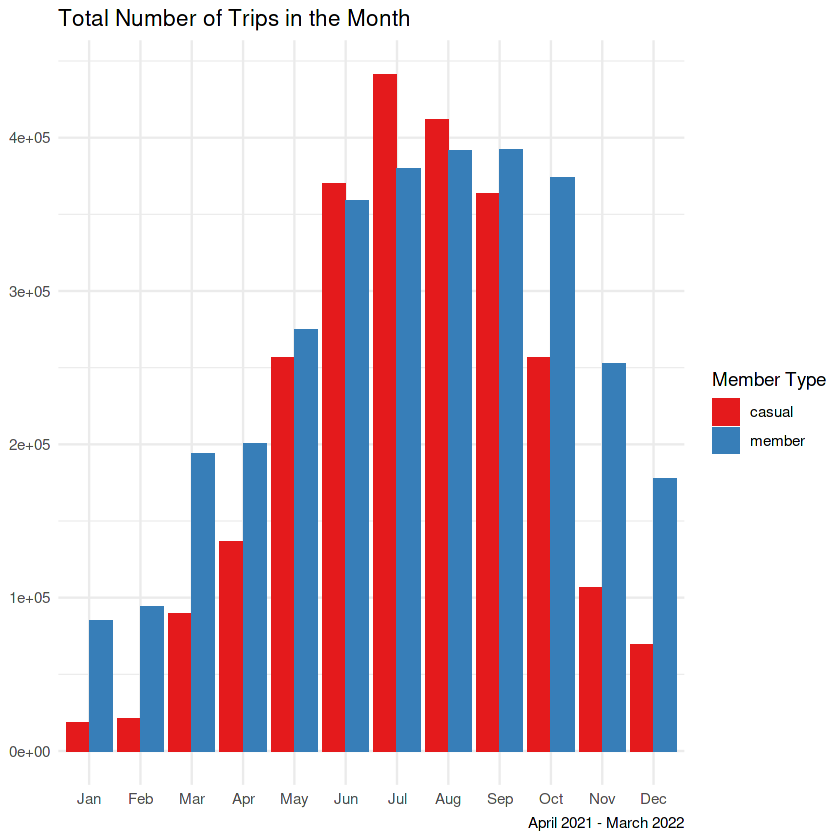

In [20]:
#Plot 1
full_data%>%
 ggplot(mapping=aes(x=month_of_ride,fill=member_casual))+
 geom_bar(position="dodge")+
 theme_minimal()+
 scale_fill_brewer(palette = "Set1")+
 labs(title = "Total Number of Trips in the Month",
       caption = "April 2021 - March 2022",
       fill = "Member Type",
       x=NULL,y=NULL)

Both types of users have preference for summer months with rides peaking in months of June, July, and August by casual riders. Whereas annual members were consistent throughout the months of June to October.

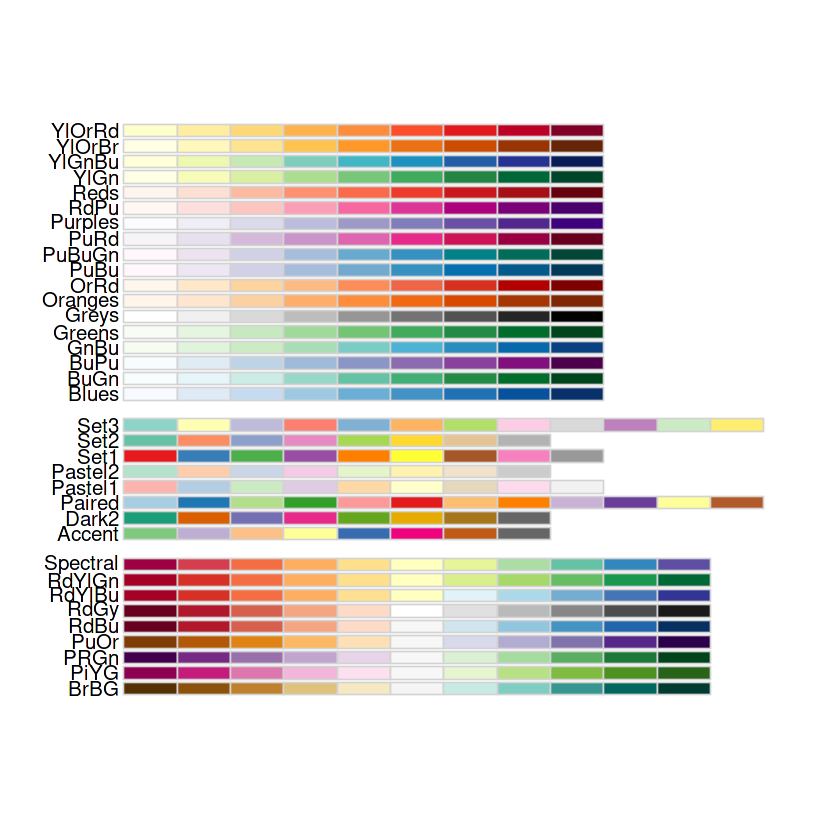

In [21]:
#For palette choices: 
RColorBrewer::display.brewer.all()

* Visualization for how rides's duration varies by days of the week.

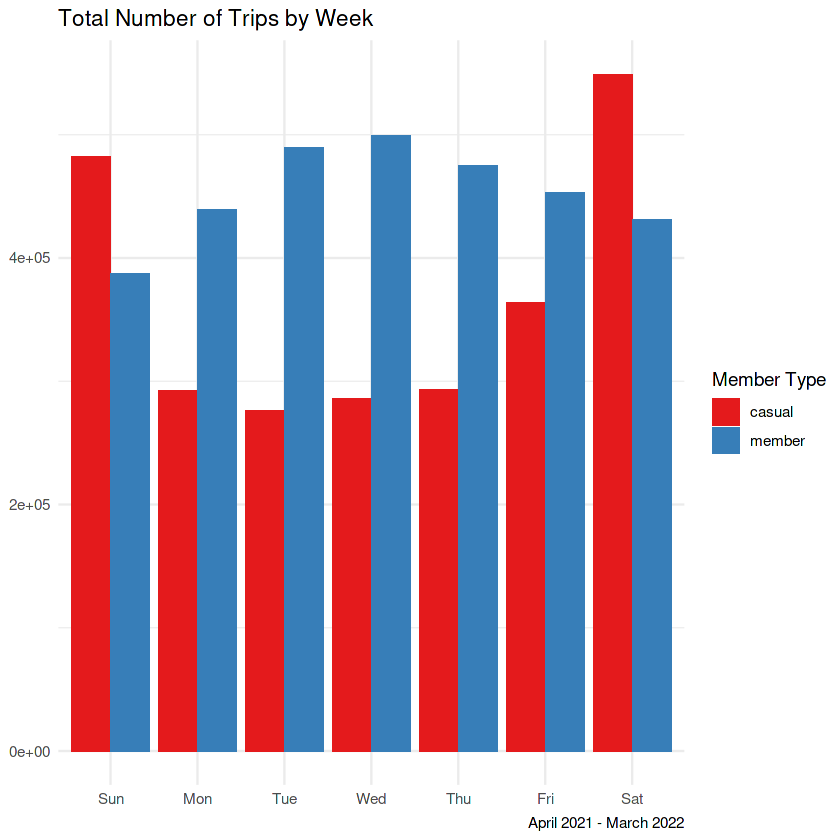

In [22]:
#Plot 2
full_data%>%
 ggplot(mapping=aes(x=day_of_week,fill=member_casual))+
 geom_bar(position="dodge")+
 theme_minimal()+
 scale_fill_brewer(palette = "Set1")+
 labs(title = "Total Number of Trips by Week",
       caption = "April 2021 - March 2022",
       fill = "Member Type",
       x=NULL,y=NULL)

Weekends have been very popular among casual riders as compared to annual members. There is a significant decrease in rides on weekdays for casual riders whereas annual members have been consistent throughout the week. 

* Visualization for at what time most of the trips started on different days of the week.

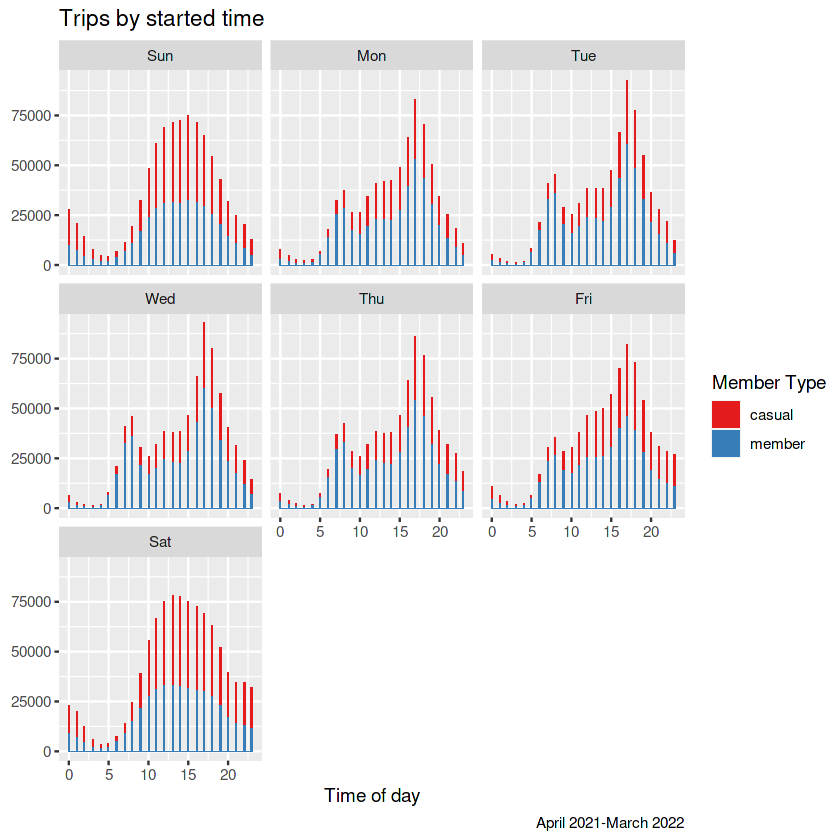

In [23]:
full_data%>%
 ggplot(mapping=aes(x=hour(time_started),fill=member_casual))+
 geom_histogram(binwidth=0.15)+
 theme_gray()+
 scale_fill_brewer(palette = "Set1")+
 labs(title="Trips by started time", caption="April 2021-March 2022",fill="Member Type",
     x="Time of day",y=NULL)+
 facet_wrap(~day_of_week)

During weekdays, there are two peaks in ridership: one in the morning and one in the afternoon. More trips are started in the afternoon on weekdays, with a more defined peak in the mornings for members. On weekends there are more trips started consistently throughout the afternoon for both groups.

* Visualization for mean time travelled by both users

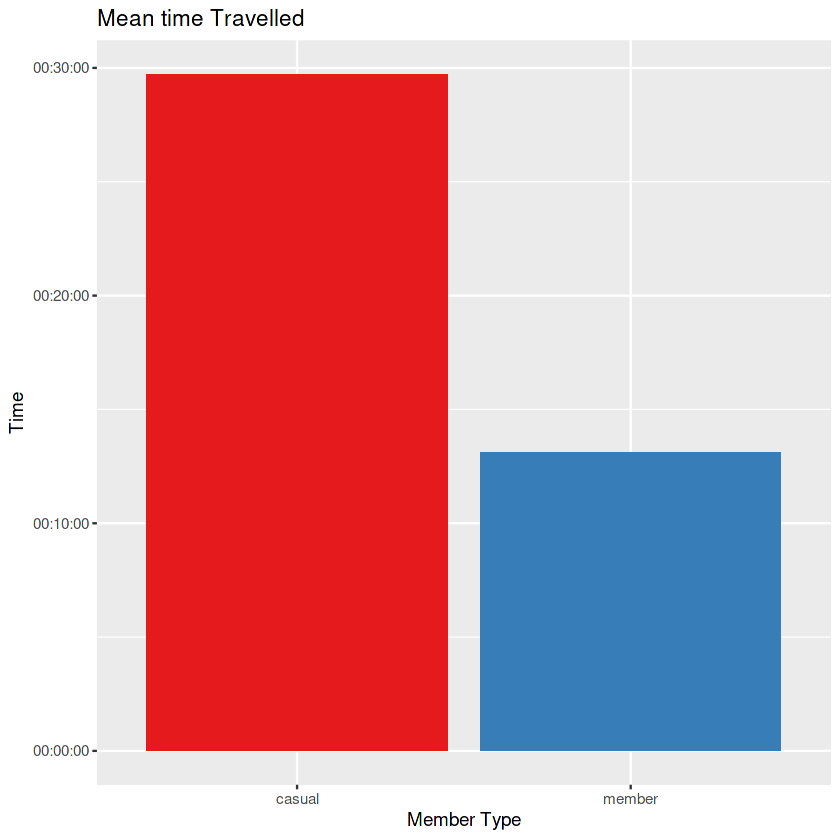

In [24]:
#mean time travelled by annual members and casual members

summary%>%
 ggplot(mapping=aes(x=member_casual,y=mean_time,fill=member_casual))+
 geom_col(show.legend=FALSE)+
 scale_fill_brewer(palette = "Set1")+
 labs(title="Mean time Travelled",x="Member Type",y="Time")

* Visualization for types of bikes used by different riders.

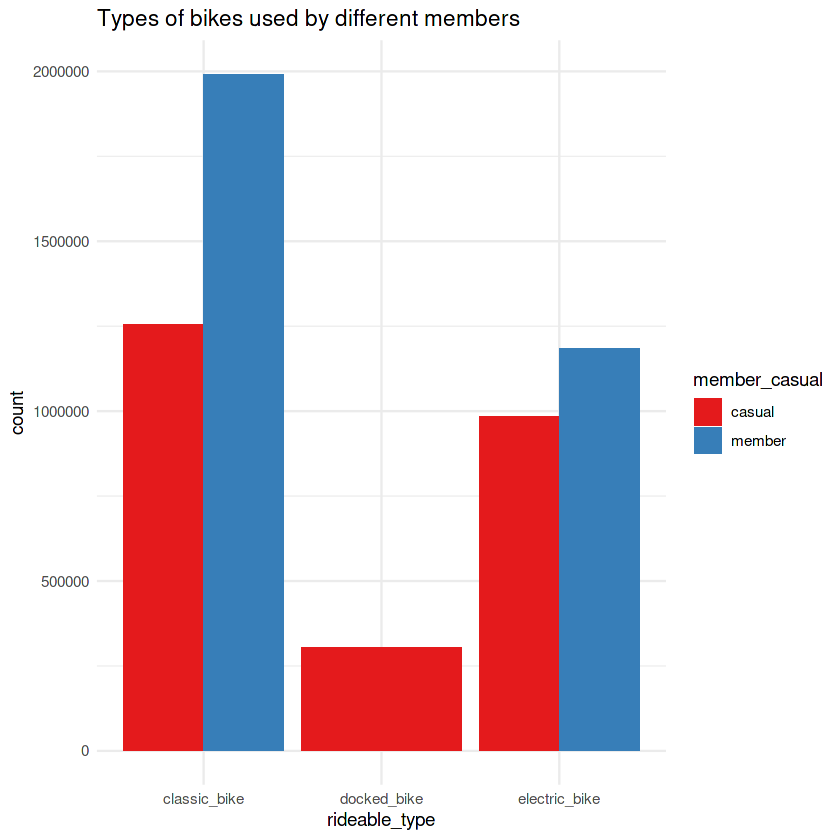

In [25]:
#Type of Bikes used by different members
full_data%>%
 ggplot(mapping=aes(x=rideable_type,fill=member_casual))+
 geom_bar(position="dodge")+
 theme_minimal()+
 scale_fill_brewer(palette = "Set1")+
 labs(title="Types of bikes used by different members")

Casual riders use all three bike types, with a slight preference for classic bikes over electric bikes. Members have a stronger preference for classic bikes.

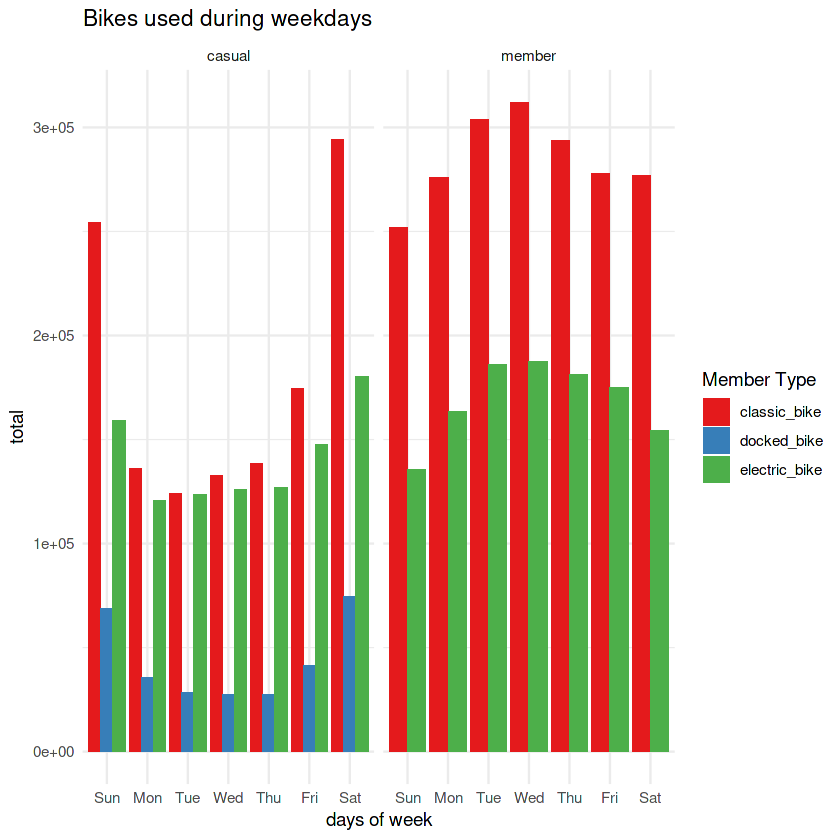

In [26]:
full_data%>%
 ggplot(mapping=aes(x=day_of_week,fill=rideable_type))+
 geom_bar(position="dodge")+
 theme_minimal()+
 scale_fill_brewer(palette = "Set1")+
 labs(title="Bikes used during weekdays",x="days of week",y="total",fill="Member Type")+
 facet_wrap(~member_casual)

#### Key findings

1. Casual riders
 * Ride mostly on weekends
 * Use classic bikes, electric bikes ,a dn docked bikes as well.
 * Ride mostly during months of June, July, and August with a significant decrease in winter months. 

2. Annual members
 * Ride consistently throughout the week.
 * Have a slight preference for classic bikes rather than electric bikes.
 * Do not use docked bikes.
 * Ride consistently throughout the summer months (June to Oct).
 

### Phase 6 Act


##### Top three recommendations based in the analysis for expanding business are:
1. Marketing campaign should be started during the months of Summer as most of the rides happen during these months.
2. Concession on the amount of fee for annual membership can be given ti casual riders and special discounts on the weekends as those are the most effective days.
3. 